# **Outlier Analysis**

## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('ENV_data_2025-06-20.csv')
df = df.rename(columns={'created_at':'date', 'field1':'Temperature', 'field2':'Humidity', 'field3':'PM2.5', 'field4':'PM10', 'field5':'CO', 'field6':'CO2'})

In [12]:
df

,date,entry_id,Temperature,Humidity,PM2.5,PM10,CO,CO2,latitude,longitude,elevation,status
0,2025-06-15T09:18:44+00:00,1,24.8,68.6,20.4,24.7,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-15T09:19:33+00:00,2,24.8,66.0,20.9,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-15T09:20:22+00:00,3,24.9,65.7,20.5,25.1,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-15T09:21:12+00:00,4,24.9,65.5,21.2,26.4,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-15T09:22:01+00:00,5,25.0,69.2,20.9,24.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4384,2025-06-19T17:33:48+00:00,4385,26.1,76.7,35.4,58.3,4.58933,406.10184,NaN,NaN,NaN,NaN
4385,2025-06-19T17:34:37+00:00,4386,26.1,76.7,36.1,54.2,4.24075,405.98636,NaN,NaN,NaN,NaN
4386,2025-06-19T17:35:27+00:00,4387,26.1,76.6,33.4,50.6,4.08809,406.09128,NaN,NaN,NaN,NaN
4387,2025-06-19T17:36:16+00:00,4388,26.1,76.6,34.4,50.7,4.72726,406.00723,NaN,NaN,NaN,NaN


In [13]:
df.drop(['latitude', 'longitude', 'elevation', 'status'], axis=1, inplace=True)

In [27]:
df.isna().sum()

date             0
entry_id         0
Temperature      0
Humidity         0
PM2.5            0
PM10             0
CO             444
CO2            444
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isna().sum()

date           0
entry_id       0
Temperature    0
Humidity       0
PM2.5          0
PM10           0
CO             0
CO2            0
dtype: int64

In [45]:
df = df[(df['CO2'] >= 400) & (df['CO'] <= 100) & (df['CO'] > 0.1)]

In [46]:
df

,date,entry_id,Temperature,Humidity,PM2.5,PM10,CO,CO2
463,2025-06-17T07:08:50+00:00,464,25.9,71.3,26.4,35.1,1.32246,402.82861
464,2025-06-17T07:09:40+00:00,465,25.9,70.1,26.2,33.3,1.28997,402.73026
465,2025-06-17T07:10:36+00:00,466,25.9,69.7,24.5,32.5,1.31978,402.81689
466,2025-06-17T07:11:26+00:00,467,25.9,69.3,24.1,31.9,1.32873,402.75455
467,2025-06-17T07:12:15+00:00,468,25.8,69.1,25.1,32.0,1.30203,402.64542
...,...,...,...,...,...,...,...,...
4384,2025-06-19T17:33:48+00:00,4385,26.1,76.7,35.4,58.3,4.58933,406.10184
4385,2025-06-19T17:34:37+00:00,4386,26.1,76.7,36.1,54.2,4.24075,405.98636
4386,2025-06-19T17:35:27+00:00,4387,26.1,76.6,33.4,50.6,4.08809,406.09128
4387,2025-06-19T17:36:16+00:00,4388,26.1,76.6,34.4,50.7,4.72726,406.00723


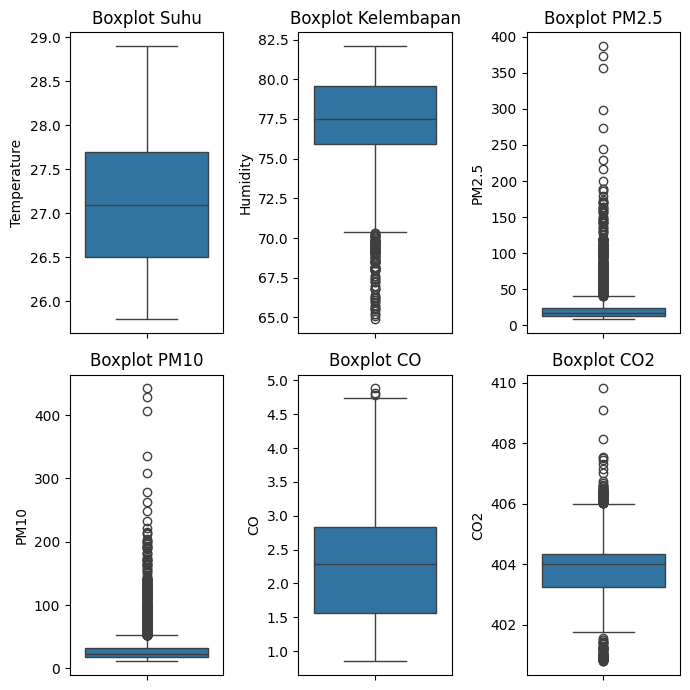

In [64]:
# Boxplot untuk cek outlier secara visual
plt.figure(figsize=(7,7))

plt.subplot(231)
sns.boxplot(data=df['Temperature'])
plt.title("Boxplot Suhu")

plt.subplot(232)
sns.boxplot(data=df['Humidity'])
plt.title("Boxplot Kelembapan")

plt.subplot(233)
sns.boxplot(data=df['PM2.5'])
plt.title("Boxplot PM2.5")

plt.subplot(234)
sns.boxplot(data=df['PM10'])
plt.title("Boxplot PM10")

plt.subplot(235)
sns.boxplot(data=df['CO'])
plt.title("Boxplot CO")

plt.subplot(236)
sns.boxplot(data=df['CO2'])
plt.title("Boxplot CO2")

plt.tight_layout()
plt.show()

## **Clustering**

In [65]:
features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'CO', 'CO2']
X = df[features]

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [70]:
df['cluster'] = kmeans.labels_

C:\Users\Muhammad Mahdi\AppData\Local\Temp\ipykernel_24092\4249771383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


In [71]:
df

,date,entry_id,Temperature,Humidity,PM2.5,PM10,CO,CO2,cluster
463,2025-06-17T07:08:50+00:00,464,25.9,71.3,26.4,35.1,1.32246,402.82861,4
464,2025-06-17T07:09:40+00:00,465,25.9,70.1,26.2,33.3,1.28997,402.73026,4
465,2025-06-17T07:10:36+00:00,466,25.9,69.7,24.5,32.5,1.31978,402.81689,4
466,2025-06-17T07:11:26+00:00,467,25.9,69.3,24.1,31.9,1.32873,402.75455,4
467,2025-06-17T07:12:15+00:00,468,25.8,69.1,25.1,32.0,1.30203,402.64542,4
...,...,...,...,...,...,...,...,...,...
4384,2025-06-19T17:33:48+00:00,4385,26.1,76.7,35.4,58.3,4.58933,406.10184,1
4385,2025-06-19T17:34:37+00:00,4386,26.1,76.7,36.1,54.2,4.24075,405.98636,1
4386,2025-06-19T17:35:27+00:00,4387,26.1,76.6,33.4,50.6,4.08809,406.09128,1
4387,2025-06-19T17:36:16+00:00,4388,26.1,76.6,34.4,50.7,4.72726,406.00723,1


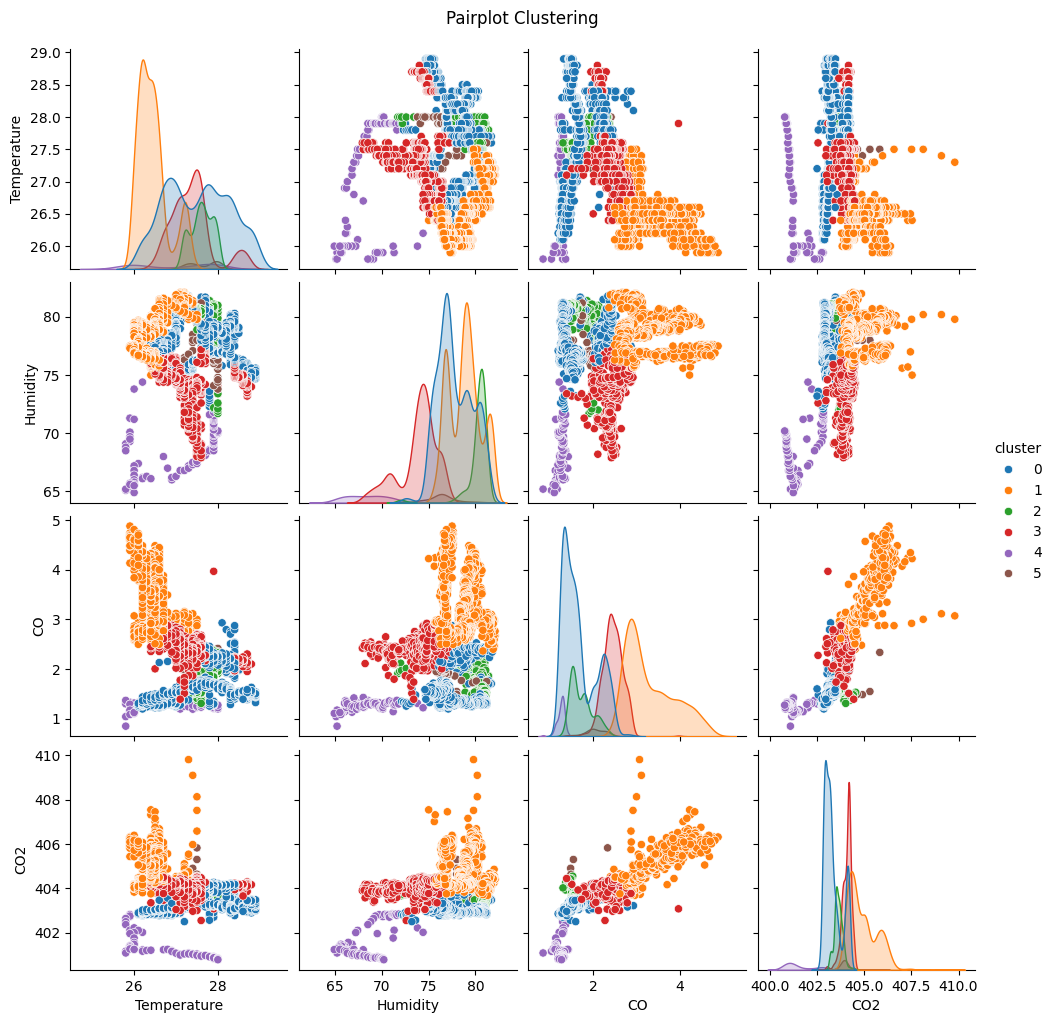

In [72]:
# Tambahkan cluster ke salinan data
df_clustered = df.copy()
sns.pairplot(df_clustered, vars=['Temperature', 'Humidity', 'CO', 'CO2'], hue='cluster', palette='tab10')
plt.suptitle("Pairplot Clustering", y=1.02)
plt.show()

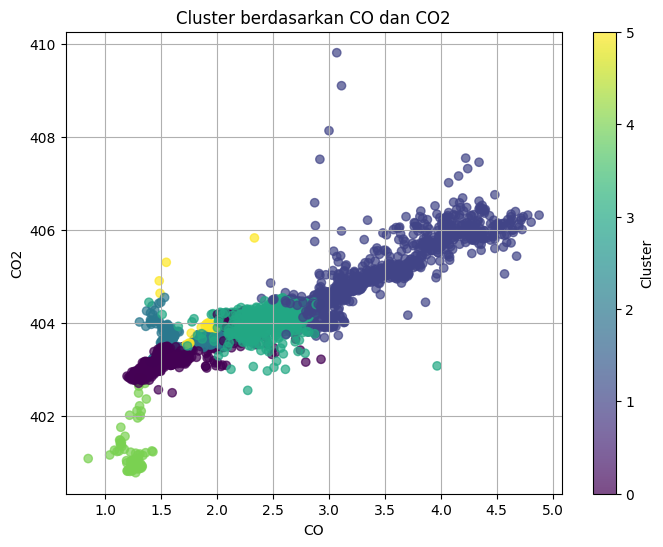

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(df['CO'], df['CO2'], c=df['cluster'], alpha=0.7)
plt.xlabel('CO')
plt.ylabel('CO2')
plt.title('Cluster berdasarkan CO dan CO2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


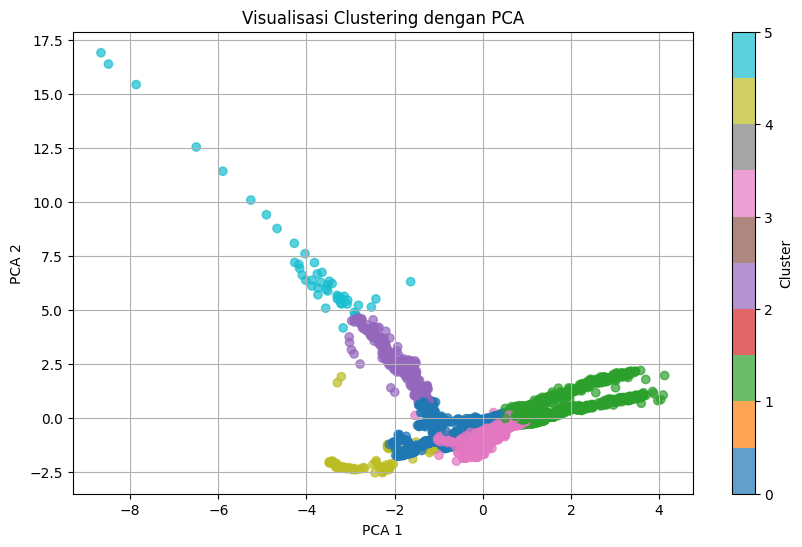

In [75]:
from sklearn.decomposition import PCA

# Reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


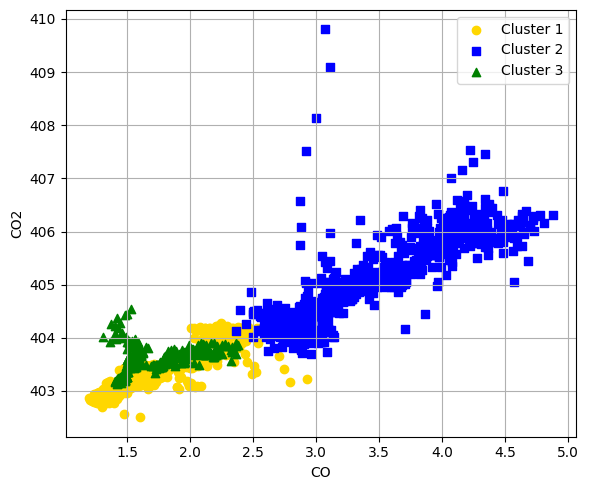

In [76]:
# Contoh: menggunakan dua fitur
x = df['CO']
y = df['CO2']

# Loop per cluster
plt.figure(figsize=(6, 5))
for cluster_id, marker, color in zip(range(3), ['o', 's', '^'], ['gold', 'blue', 'green']):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['CO'], cluster_data['CO2'],
                label=f'Cluster {cluster_id+1}',
                marker=marker,
                color=color)

# Label dan gaya
plt.xlabel("CO")
plt.ylabel("CO2")
plt.legend()
plt.grid(True)
plt.tight_layout()

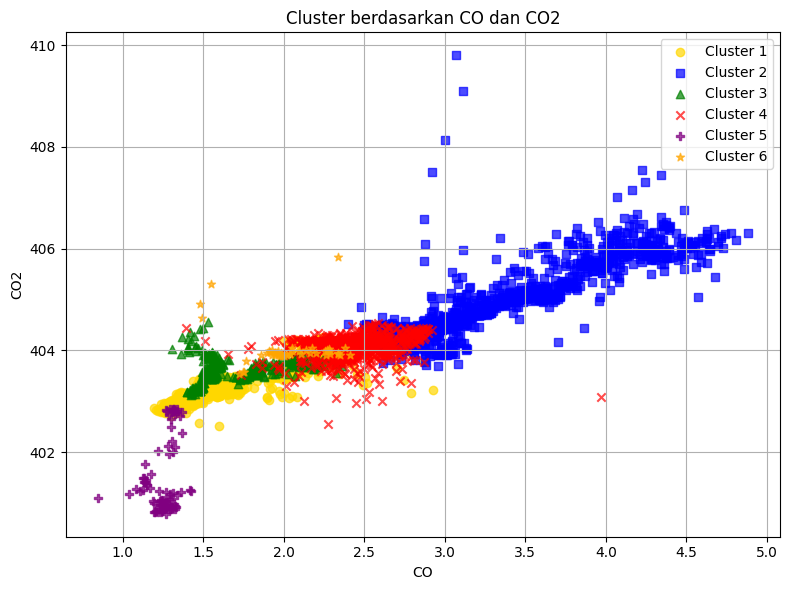

In [77]:
import matplotlib.pyplot as plt

# Warna untuk tiap cluster
colors = ['gold', 'blue', 'green', 'red', 'purple', 'orange']  # Bisa disesuaikan
markers = ['o', 's', '^', 'x', 'P', '*']  # Marker unik per cluster

plt.figure(figsize=(8, 6))

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['CO'], cluster_data['CO2'],
                color=colors[cluster_id % len(colors)],
                marker=markers[cluster_id % len(markers)],
                label=f'Cluster {cluster_id + 1}',
                alpha=0.7)

plt.xlabel('CO')
plt.ylabel('CO2')
plt.title('Cluster berdasarkan CO dan CO2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
from sklearn.metrics import pairwise_distances_argmin_min

# Hitung jarak tiap titik ke centroid-nya
_, distances = pairwise_distances_argmin_min(X_scaled, kmeans.cluster_centers_)

# Tambahkan ke dataframe
df['distance_to_center'] = distances

# Tandai sebagai fault jika jarak terlalu jauh (misal di atas percentile ke-95)
threshold = df['distance_to_center'].quantile(0.95)
df['sensor_fault'] = df['distance_to_center'] > threshold

C:\Users\Muhammad Mahdi\AppData\Local\Temp\ipykernel_24092\2008977976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_center'] = distances
C:\Users\Muhammad Mahdi\AppData\Local\Temp\ipykernel_24092\2008977976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sensor_fault'] = df['distance_to_center'] > threshold


In [87]:
df

,date,entry_id,Temperature,Humidity,PM2.5,PM10,CO,CO2,cluster,distance_to_center,sensor_fault
463,2025-06-17T07:08:50+00:00,464,25.9,71.3,26.4,35.1,1.32246,402.82861,4,2.249504,True
464,2025-06-17T07:09:40+00:00,465,25.9,70.1,26.2,33.3,1.28997,402.73026,4,2.037144,False
465,2025-06-17T07:10:36+00:00,466,25.9,69.7,24.5,32.5,1.31978,402.81689,4,2.070788,False
466,2025-06-17T07:11:26+00:00,467,25.9,69.3,24.1,31.9,1.32873,402.75455,4,2.004199,False
467,2025-06-17T07:12:15+00:00,468,25.8,69.1,25.1,32.0,1.30203,402.64542,4,2.019172,False
...,...,...,...,...,...,...,...,...,...,...,...
4384,2025-06-19T17:33:48+00:00,4385,26.1,76.7,35.4,58.3,4.58933,406.10184,1,2.505034,True
4385,2025-06-19T17:34:37+00:00,4386,26.1,76.7,36.1,54.2,4.24075,405.98636,1,2.150115,True
4386,2025-06-19T17:35:27+00:00,4387,26.1,76.6,33.4,50.6,4.08809,406.09128,1,2.061090,False
4387,2025-06-19T17:36:16+00:00,4388,26.1,76.6,34.4,50.7,4.72726,406.00723,1,2.467515,True


In [88]:
print(df['sensor_fault'].value_counts())  # Jumlah data normal vs fault


sensor_fault
False    3729
True      197
Name: count, dtype: int64


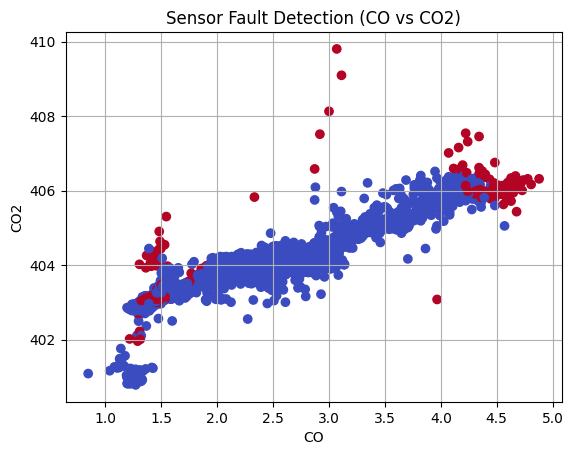

In [89]:
plt.scatter(df['CO'], df['CO2'], c=df['sensor_fault'], cmap='coolwarm')
plt.title('Sensor Fault Detection (CO vs CO2)')
plt.xlabel('CO')
plt.ylabel('CO2')
plt.grid(True)
plt.show()


In [90]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

df['dbscan_label'] = labels
df['sensor_fault'] = df['dbscan_label'] == -1  # -1 = outlier


C:\Users\Muhammad Mahdi\AppData\Local\Temp\ipykernel_24092\235161416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dbscan_label'] = labels
C:\Users\Muhammad Mahdi\AppData\Local\Temp\ipykernel_24092\235161416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sensor_fault'] = df['dbscan_label'] == -1  # -1 = outlier


In [91]:
df

,date,entry_id,Temperature,Humidity,PM2.5,PM10,CO,CO2,cluster,distance_to_center,sensor_fault,dbscan_label
463,2025-06-17T07:08:50+00:00,464,25.9,71.3,26.4,35.1,1.32246,402.82861,4,2.249504,True,-1
464,2025-06-17T07:09:40+00:00,465,25.9,70.1,26.2,33.3,1.28997,402.73026,4,2.037144,True,-1
465,2025-06-17T07:10:36+00:00,466,25.9,69.7,24.5,32.5,1.31978,402.81689,4,2.070788,True,-1
466,2025-06-17T07:11:26+00:00,467,25.9,69.3,24.1,31.9,1.32873,402.75455,4,2.004199,False,0
467,2025-06-17T07:12:15+00:00,468,25.8,69.1,25.1,32.0,1.30203,402.64542,4,2.019172,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4384,2025-06-19T17:33:48+00:00,4385,26.1,76.7,35.4,58.3,4.58933,406.10184,1,2.505034,False,2
4385,2025-06-19T17:34:37+00:00,4386,26.1,76.7,36.1,54.2,4.24075,405.98636,1,2.150115,False,2
4386,2025-06-19T17:35:27+00:00,4387,26.1,76.6,33.4,50.6,4.08809,406.09128,1,2.061090,False,2
4387,2025-06-19T17:36:16+00:00,4388,26.1,76.6,34.4,50.7,4.72726,406.00723,1,2.467515,False,2


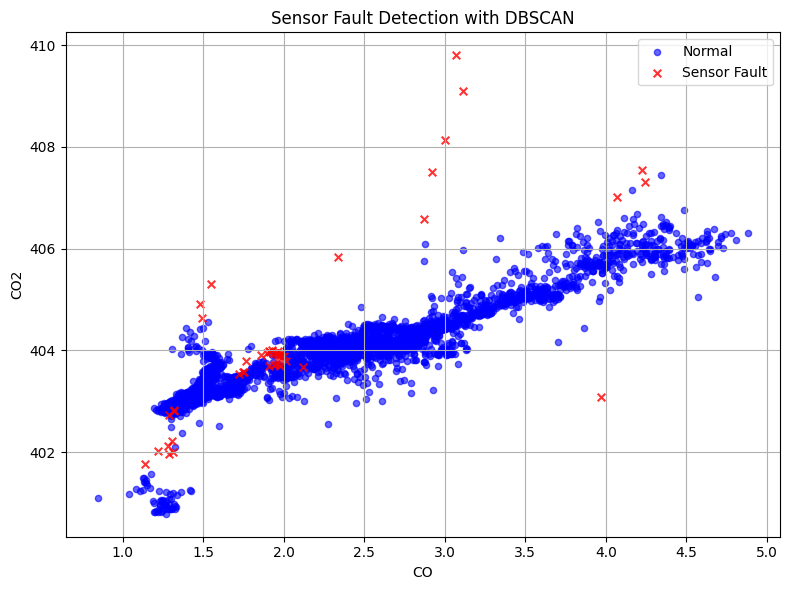

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df[df['sensor_fault'] == False]['CO'],
            df[df['sensor_fault'] == False]['CO2'],
            label='Normal', alpha=0.6, c='blue', s=20)

plt.scatter(df[df['sensor_fault'] == True]['CO'],
            df[df['sensor_fault'] == True]['CO2'],
            label='Sensor Fault', alpha=0.8, c='red', s=30, marker='x')

plt.xlabel('CO')
plt.ylabel('CO2')
plt.title('Sensor Fault Detection with DBSCAN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
